## Unsupervised Learning: k-Means Clustering
---------
We hope you enjoy the tutorial! Before we start diving into the material, let's make sure that you have your environment up and running. Simply run the code below -- if things break, you can install the dependencies using pip or conda.

## 1. Setup:
----------
If you're already familiar with Python, below are the packages that you need for our code example. Otherwise, [this link](https://try.jupyter.org/) lets you use IPython notebooks without any additional setup (and comes with a bunch of packages pre-installed!). Either one is fine. If you're using the link, you can just simply copy and paste the code here and run it through the website.

In [1]:
# useful packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time

# this will get us pretty pictures embedded into the notebook
%matplotlib inline

## 2. So What's Unsupervised Learning?
-------

The basic notion behind machine learning is that you're given a dataset with an interesting backstory, and it's up to you to figure out what that story is. Maybe you want to predict the next big thing that's gonna break the stock market, or understand (at an even deeper level than you already do now) the relationship between your stress levels and pounds of chocolate consumption. In both cases you're looking at the ways in which several different things interact, and uncovering the hidden patterns that allow you to draw insightful conclusions from your data.

We can break down such problems into two basic categories: 1) supervised and 2) unsupervised. Supervised learning is when your explanatory variables X come with an associated reponse variable Y. So essentially you get a sneak peak at the true "labels": maybe for all the participants in a clinical trial, you're given whether their treatments were successful or not. But in *unsupervised learning*, sorry -- no cheating. You get a bunch of X's without the Y's. There's some ground truth that we don't have access to. We just have to do our best to extract some meaning out of the data's underlying structure and do some checks to make sure that our methods are robust. 

One example of such an unsupervised learning algorithm is clustering, and that’s what we’ll be talking about today :D

## 3. Clustering
---
Clustering is exactly what it sounds like: a way of grouping “similar” data points together into *clusters* or *subgroups*, while keeping each group as distinct as possible. In this way data points belonging to different clusters will be quite different from each other, too. This is useful because oftentimes we'll come across datasets which exhibit this kind of grouped structure. **k-Means** is simply one out of the several ways in which you can perform clustering on your data.

But wait -- you've probably noticed that we've introduced some vague concepts. What does it mean for two data points to be "similar?" And are we actually moving the points around physically when we group them together? 

These are all good questions, so let’s walk through some vocab before we walk through the steps of the k-means clustering algorithm:

### 3. (a) Similarity:
Intuitively, it makes sense that similar things should be close to each other, while different things should be further apart. So to formalize the notion of **similarity**, we choose a **distance metric** (see below) that can quantify exactly how "close" two points are to each other. The most commonly used distance metric is the Euclidean distance which we should all be pretty familiar with (think: distance formula from middle school), and that's what we'll be using in our example today. We'll introduce some other distance metrics towards the end of the notebook. 

### 3. (b) Cluster centroid:
The **cluster centroid** is the most representative feature of the entire cluster. We say "feature" instead of "point" because the centroid may not necessarily be an existing point in the cluster. You can find it by averaging the values of all the points belonging to a specific group. But any relevant information about the cluster centroid tells us everything that we need to know about all other points in the same cluster. Think of it as the cluster's (democratic) president.

## 4. The k-Means Algorithm
---
The k-means algorithm has a simple objective: given a set of data points, it tries to separate them out into *k* distinct clusters. It uses the same principle that we mentioned earlier: keep the data points within each cluster as similar as possible. You have to provide the value of **k** to the algorithm, so you should have a general idea of how many clusters you're expecting to see in your data. 

Let’s start by tossing all of our data points onto the screen to see what our data actually looks like. This kind of exploratory data visualization can provide a rough guide as to how we should start clustering our data together. Remember that clustering is an *unsupervised learning method*, so we’re never going to have a perfect answer for our final clusters. But let’s do our best to make sure that the results we get are **reasonable** and **replicable**. By replicable, we mean that our results can be arrived at by someone else using a different starting point. By reasonable, we mean that our results have to show some correlation with what we expect to encounter in real life. 

![alt-text](http://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2012/AN/c2an16122b/c2an16122b-f3.gif "k-means clustering algorithm")

##### (a) 
Okay, our data seems to have some sort of underlying structure. Let’s use this information to initialize our k-means algorithm with k = 3 clusters. Right now we’re operating under the assumption that we know how many clusters we want, but we’ll go into more detail about relaxing this assumption and how to choose “the best possible k” at the end of the workshop. 

##### (b) 
k-Means works like this. First we “throw down” three random cluster centroids. We initialize these clusters randomly because every iteration of k-means will "correct" them towards the right clusters. Since we are heading to a correct answer anyway, we don't really care about where we start. 

As we explained before, these centroids are our “representative points” -- they contain all the information that we need about other points in the same cluster. It makes sense to think about these centroids as being the physical center of each cluster. So let’s pretend like our randomly initialized cluster centers are the actual centroids, and group our points accordingly. Here we use our distance metric of choice -- for our example we’ll stick with the good old Euclidean distance. So for every single data point we have, we compute the two distances: one from the first cluster centroid, and the other from the second centroid. We assign this data point to the cluster at which the distance to the centroid is the smallest. This makes sense, because intuitively we’re grouping points which are closer together.

##### (c)
Now we have something that’s starting to resemble three distinct clusters! But remember that we need to update the centroids that we started with -- we’ve just added in a bunch of new data points to each cluster, so we need our “representative point,” or our centroid, to reflect that. 

##### (d)-(e)-(f)-(g)
So we’ll just do quick averaging of all the values within each cluster and call that our new centroid. Thew new centroids are further "within" the data than the older centroids. 
Notice that we’re not quite done yet -- we have some straggling points which don’t really seem to belong in either cluster. Let’s run another iteration of k-means and see if that separates out the clusters better. So recall that we’re just computing the distances from the centroids for each data point, and re-assigning those that are closer to centroids of the other cluster.

##### (h)
We keep computing the centroids for every iteration using the steps (c) and (d). Okay, so after doing the few iterations, maybe you’ve noticed that the clusters don’t change after a certain point. This actually turns out to be a good criterion for stopping the cluster iterations! Think about it this way. There’s no need to keep running the algorithm if our answer isn’t going to change after a certain point in time. At that point we’re just wasting time and computational resources. So let’s formalize this idea of a “stopping criterion.” We define a small value, call it “epsilon” because we can, and we can terminate the algorithm when the change in cluster centroids is less than epsilon. This way, epsilon serves as a measure of how much error we can tolerate.   

## 5. Image Segmentation Example
------------------------------
Let's move on to a real-life example. We're going to need a couple of images, which live in the `datasets/kmeans/imgs` folder. 

We know that images often have a few dominant colors -- for example, the bulk of the image is often made up of the foreground color and the background color. In this example, we'll write some code that uses `scikit-learn`'s k-means clustering implementation to find the what these dominant colors may be. `scikit-learn`, or `sklearn` for short, is our friend who has a bunch of built-in machine learning algorithms all coded up and ready to use. 

Once we know what the most important colors are in an image, we can compress (or "quantize") the image by re-expressing the image using only the set of k colors that we get from the algorithm. Let's try it!

In [16]:
# let's list what images we have to work with
imgs = os.listdir('datasets/kmeans/imgs/')
print(imgs)

['columbia.jpg', 'leo_bb.png', 'mario.png']


To celebrate Leo's long overdue receipt of the Oscar on Sunday, let's use an image of his beautiful, brooding face for our code example.

Using image 0: path datasets/kmeans/imgs/leo_bb.png


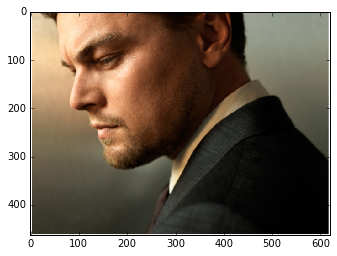

In [3]:
img_path = os.path.join('datasets/kmeans/imgs/', imgs[1])
print('Using image 0: path {}'.format(img_path))

img = mpimg.imread(img_path)

# normalize the image values
img = img * 1.0 / img.max()

imgplot = plt.imshow(img)

An image is represented here as a three-dimensional array of floating-point numbers, which can take values from 0 to 1. If we look at ``img.shape``, we'll find that the first two dimensions are x and y, and then the last dimension is the color channel. There are three color channels (one each for red, green, and blue). A set of three channel values at a single (x, y)-coordinate is referred to as a "pixel".

As usual, we want to pick a small random sample of the data to train with. We're going to use a randomly selected 10% of the image to train our clusters with.

In [4]:
print('Image shape: {}'.format(img.shape))
width, height, num_channels = img.shape
num_pixels = width * height
num_sample_pixels = num_pixels / 10

print('Sampling {} out of {} pixels'.format(num_sample_pixels, num_pixels))

Image shape: (462, 621, 3)
Sampling 28690.2 out of 286902 pixels


Next we need to reshape the image data into a single long array of pixels (instead of a two-dimensional array of pixels) in order to take our sample.

In [5]:
img_reshaped = np.reshape(img, (num_pixels, num_channels))
img_sample = shuffle(img_reshaped, random_state=0)

Now that we have some data, let's construct our k-means object and feed it some data. It will find the best k clusters, as determined by a distance function.

In [11]:
# We're going to try to find the 20 colors which best represent
K = 20

t0 = time()
kmeans = KMeans(n_clusters=K, random_state=0)

# Similar to the other scikit-learn code you've seen in the
# past, we can call the fit() function to run the training
# code (in this case, the clustering code). Unlike the
# examples you've seen before, we don't need to pass in a Y
# array, since K-means doesn't need any labels!

kmeans.fit(img_sample)
print("K-means clustering complete. Elapsed time: {} seconds".format(time() - t0))

K-means clustering complete. Elapsed time: 22.35943293571472 seconds


The centers of each of the clusters represents a color that was significant in the image. We can grab the values of these colors from `kmeans.cluster_centers_`. We can also call `kmeans.predict()` to match each pixel in the image to the closest color, which will let us know the size of each cluster (and also serve as a way to quantize the image)

In [12]:
# As you can see, there are K cluster centers, each of which is a RGB color
kmeans.cluster_centers_

array([[ 0.07612229,  0.06211287,  0.04639459],
       [ 0.87645387,  0.67421014,  0.50685788],
       [ 0.5207748 ,  0.5071716 ,  0.42136219],
       [ 0.21635873,  0.21394513,  0.17679547],
       [ 0.98117046,  0.98098893,  0.9799043 ],
       [ 0.46593685,  0.42759775,  0.33543924],
       [ 0.93370034,  0.77720655,  0.61024734],
       [ 0.57460707,  0.59612759,  0.5341335 ],
       [ 0.34889147,  0.18319624,  0.09478154],
       [ 0.66955032,  0.47967787,  0.32775414],
       [ 0.45746264,  0.26280931,  0.15384449],
       [ 0.01439734,  0.0128709 ,  0.01049489],
       [ 0.7748409 ,  0.56443004,  0.40117455],
       [ 0.2508174 ,  0.12307402,  0.05237731],
       [ 0.15426111,  0.15618018,  0.13350486],
       [ 0.28686017,  0.27708472,  0.22678647],
       [ 0.5812672 ,  0.36168371,  0.2278664 ],
       [ 0.97826378,  0.85179807,  0.70266952],
       [ 0.16649816,  0.07412208,  0.02851689],
       [ 0.36618026,  0.34880321,  0.28024263]])

In [13]:
t0 = time()
labels = kmeans.predict(img_reshaped)
print("k-means labeling complete. Elapsed time: {} seconds".format(time() - t0))

k-means labeling complete. Elapsed time: 0.08985304832458496 seconds


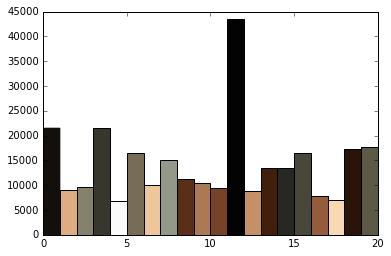

In [14]:
# construct a histogram of the points in each cluster
n, bins, patches = plt.hist(labels, bins=range(K+1))

# We're going to do a bit of magic to color the bins the right color
for p, color in zip(patches, kmeans.cluster_centers_):
    plt.setp(p, 'facecolor', color)

As you might be able to tell from the above histogram, the most dominant color in the scene is the background color, followed by a large drop down to the foreground colors. This isn't all that surprising, since visually we can see that the space is mostly filled with the background color -- that's why it's called the "background".

Now, let's redraw the scene using only the cluster centers! This can be used for image compression, since we only need to store the index into the list of cluster centers and the colors corresponding to each center, rather than the colors corresponding to each pixel in the image.

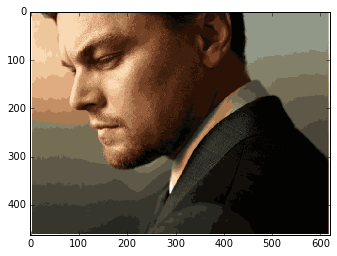

In [15]:
quantized_img = np.zeros(img.shape)
for i in range(width):
    for j in range(height):
        # We need to do some math here to get the correct
        # index position in the labels array
        index = i * height + j
        quantized_img[i][j] = kmeans.cluster_centers_[labels[index]]

quantized_imgplot = plt.imshow(quantized_img)

Note that the image looks similar, but that the gradients are no longer as smooth, and there are a few image artifacts scattered throughout. This is because we're only using the k best colors, which excludes the steps along the gradient.

Try running the code through again with a different image, or with a larger (or smaller) value of k!


## 6. Limitations, Extensions and the basis of some assumptions used above

### I. Choosing the Right K
In our very first example, we started with k = 3 centroids. In case you're wondering how we arrived at this magic number and why, read on. 

#### I. (a) Known number of centroids (Relatively Easy)
Sometimes, you may be in a situation where the number of clusters is provided to you beforehand. For example, you may be asked to categorize a vast range of different bodily actions to the three main subdivisions of the brain (cerebrum, cerebellum and medulla). Here you know that you are looking for three main clusters where each cluster will represent the part of the brain the data point is grouped to. So in this situation, you expect to have three centroids. 
    
#### I. (b) Unknown number of centroids (Hard)
However, there may be other situations while training in which you may not even know how many centroids to pick up from your data. Two extreme situations can happen.
* You could either end up making each point its own representative (a perfect centroid) at the risk of losing any grouping tendencies. This is usually called the overfitting problem. While each point perfectly represents itself, it gives you no general information about the data as a whole and will be unable to tell you anything relevant about new data that is coming in.
* You could end up choosing only one centroid from all the data (a perfect grouping). Since there is no way to generalize an enormous volume of data to one point alone, this method loses relevant distinguishing features of the data.This is kind of like saying that all the people in the world drink water, so we can cluster them all by this feature. In Machine Learning terminology, this is called the underfitting problem. Underfitting implies that we are generalizing all of our data to a potentially trivial common feature.

#### I. (c) How to find how many centroids should be in a cluster? 
Unfortunately, there’s no easy way to determine the optimal value of k. It’s a hard problem: we have to think about balancing out the number of clusters that makes the most sense for our data, while at the same time making sure that we don’t overfit our model to the exact dataset that we have. There are a few ways that we can address this, and we’ll briefly mention them here.

The most intuitive explanation is the idea of **stability**. If the clusters we obtain represent a true, underlying pattern in our data, it makes sense that the clusters shouldn’t change very much on separate but similar samples. So if we randomly subsample or split our data into smaller parts and run the clustering algorithm again, the cluster memberships shouldn’t drastically change. If they did, that’d be an indication that our clusters were too finely-tuned to the random noise in our data. Therefore, we can compute “stability scores” for a fixed value of k and observe which value of k gives us the most stable clusters. This idea of *perturbation* is really important for machine learning in general, and will come up time and time again.

We can also use **penalization approaches**, where we use different criterion such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to keep the value of k under control. 

#### I. (d) What if we can’t cluster the data?
* In the tutorial above, we try to classify each of our points into one of K clusters. But sometimes, maybe you are clustering based on a feature that is not so exclusive. For example, people usually enjoy more than one genre of music, or food. It would be pretty difficult to form a clustering system such that a person can be a fan of ice-cream or a fan of tiramisu but not both. Hence when we need to "share" members of clusters, we are doing something called **probabilistic clustering** or **fuzzy clustering**. 

### II. What features should I use? 

If you are still getting questionable results, consider the possibility that the features on which you are trying to cluster may not be good indicators. Consider, for example, a clustering algorithm which clusters people on economic categories based on how many Buzzfeed quizzes they take per week. While you may get a clustering all the same, you know Buzzfeed quizzes are not exactly empirical indicators of earning potential (some personal opinions may differ). The motto is **garbage metrics will give you garbage clusters**. 

### III. Distance Metric

We used the Euclidean distance to find out which points are most closely related to each other. Depending on the distance metric you're using, you can get a different set of clusters. 

The choice of the distance metric depends on the kind and characteristics of the data you're getting. For example, distances between "how alike are these faces?" cannot be properly determined by an Euclidean distance metric, but may operate better with another similarity measure. DNA and biological data often use non-Euclidean distance metrics. 

[A list of commonly used distance metrics](http://www.mathworks.com/help/stats/kmeans.html?refresh=true)

### IV. I have too many features. How do I find the most relevant ones to cluster with?

When you encounter too many features to cluster on (and can't choose which one should be the basis of clustering), you can use a machine learning hack called Principal Components Analysis. While we will be covering this topic sometime later in this course, the takeaway is that PCA can rank the most relevant eigenvectors of the data in decreasing order of relevance. 

Other reasons to use PCA include
* You want to plot multi-dimensional data on a 2D graph (PCA equivalent: render only the first two eigenvectors)
* You want to minimize computational cost (Mo features = mo time to compute distances = less time to celebrate results. PCA gives you lesser features to process.)

## 7. Other Clustering Algorithms

Of course, k-means is just one of the several unsupervised clustering algorithms out there, and each method has its own strengths and weaknesses. k-Means, for example, scales very well for the number of data points but not so much for the number of clusters. It also optimizes for the given number of k, which means that it gives wonky results for values of k that don’t make sense in the context of the data. We’ll briefly mention two other clustering methods that bypass these challenges. 

#### Hierarchical Clustering:
For hierarchical clustering, there’s no need to worry about the best number of clusters. Essentially the algorithm cranks through each data point, grouping the most similar ones together until it ends up with a bunch of small clusters. Then, it clusters these clusters together until you’re left with one giant super-cluster. 

#### Expectation-Maximization (EM):
EM is *the generalized* clustering algorithm. It views the data as a mixture of different distributions, and tries to find what those distributions are accordingly. It’s a **probabilistic clustering method**, though, in that it doesn’t assign each data point to a fixed cluster. Instead, it determines the probabilities with which each point belongs to each cluster. For example, it may find that a point belongs to cluster 1 with probability 0.95, and cluster 2 with probability 0.05. It iteratively estimates the cluster assignment probabilities and computes the distributional parameters for each cluster.

## 8. Further Reading (because you know you really want to!)
----------------
* [Heavy-duty unsupervised learning resource](http://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf)
* [Bags of Words to Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-3-more-fun-with-word-vectors) (super fun Kaggle tutorial that you can do!)
* [An Introduction to Statistical Learning in R - James, Witten, Hastie, Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf) (awesome textbook)
* [Elements of Statistical Learning (ESL) - Friedman, Hastie, Tibshirani](http://statweb.stanford.edu/~tibs/ElemStatLearn/)
* [Pattern Recognition and Machine Learning - Bishop](http://www.rmki.kfki.hu/~banmi/elte/Bishop%20-%20Pattern%20Recognition%20and%20Machine%20Learning.pdf)
